## Telecom Customer Churn Case Study

### You have been provided with a dataset related to telecom customer churn. Each row in the dataset represents a unique customer, and the columns contain various attributes and information about these customers.

The data set includes information about:
- Churn Column: Indicates customer churn within the last month.
- Services Info: Subscribed services like phone, internet, etc.
- Account Details: Tenure, contract, billing, charges.
- Demographics: Gender, age, and family status.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [11]:
df  = pd.read_csv("data/telecom_customer_churn.csv")
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.describe()

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [14]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [15]:
df['paperless_billing'].unique()
df['multiple_lines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

### Data Preprocessing

In [16]:
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.drop(columns=['customer_id'],inplace=True)

In [19]:
df.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [20]:
##Printing numerical cols 
num_cols = df.select_dtypes(include=('int64','float64')).columns
num_cols

Index(['senior_citizen', 'tenure', 'monthly_charges'], dtype='object')

In [21]:
##Creating cat_df separately to print unique categories
cat_cols = df[df.select_dtypes(include=('object')).columns]
cat_cols.head(10)

,gender,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
5,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes
6,Male,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1949.4,No
7,Female,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,301.9,No
8,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes
9,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),3487.95,No


In [22]:
cat_cols.describe()

,gender,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [23]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             7043 non-null   object
 1   partner            7043 non-null   object
 2   dependents         7043 non-null   object
 3   phone_service      7043 non-null   object
 4   multiple_lines     7043 non-null   object
 5   internet_service   7043 non-null   object
 6   online_security    7043 non-null   object
 7   online_backup      7043 non-null   object
 8   device_protection  7043 non-null   object
 9   tech_support       7043 non-null   object
 10  streaming_tv       7043 non-null   object
 11  streaming_movies   7043 non-null   object
 12  contract           7043 non-null   object
 13  paperless_billing  7043 non-null   object
 14  payment_method     7043 non-null   object
 15  total_charges      7043 non-null   object
 16  churn              7043 non-null   object


In [24]:
##Printing unique category from categorical columns 
for col in cat_cols:
        print(f"\nThe unique value for category {col} :{cat_cols[col].unique()}")


The unique value for category gender :['Female' 'Male']

The unique value for category partner :['Yes' 'No']

The unique value for category dependents :['No' 'Yes']

The unique value for category phone_service :['No' 'Yes']

The unique value for category multiple_lines :['No phone service' 'No' 'Yes']

The unique value for category internet_service :['DSL' 'Fiber optic' 'No']

The unique value for category online_security :['No' 'Yes' 'No internet service']

The unique value for category online_backup :['Yes' 'No' 'No internet service']

The unique value for category device_protection :['No' 'Yes' 'No internet service']

The unique value for category tech_support :['No' 'Yes' 'No internet service']

The unique value for category streaming_tv :['No' 'Yes' 'No internet service']

The unique value for category streaming_movies :['No' 'Yes' 'No internet service']

The unique value for category contract :['Month-to-month' 'One year' 'Two year']

The unique value for category paperless_bill

In [25]:
##Datatype of total_charges is object but it should be float. So lets convert it into float

df.total_charges.dtype

dtype('O')

In [26]:
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')

In [27]:
df['total_charges'].dtype

dtype('float64')

In [28]:
df.total_charges.isnull().sum()

np.int64(11)

In [29]:
df['total_charges'] = df['total_charges'].fillna(df['total_charges'].median())

In [30]:
df.total_charges.isnull().sum()

np.int64(0)

In [31]:
##churn column is originally in a object format so lets convert it into int
df['churn'].dtype

dtype('O')

In [32]:
df['churn'] = df['churn'].map({'No': 0, 'Yes': 1})

In [33]:
df.churn.dtype

dtype('int64')

## EDA

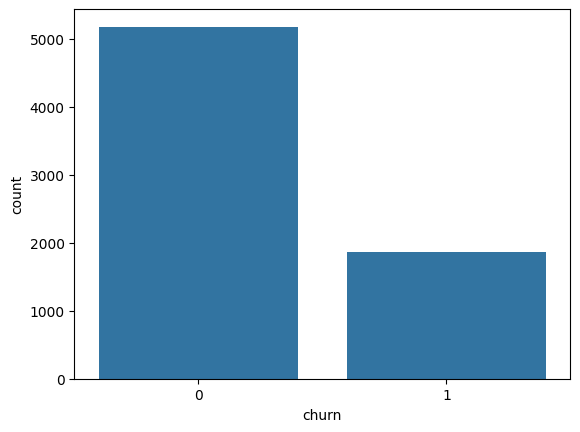

In [34]:
sns.countplot(x=df['churn'])
plt.show()

#### By observing the tenure distribution we can convert tenure into a specific tenure range so it will help us to get the specific range 
For that we will create a bins (range) for tenure

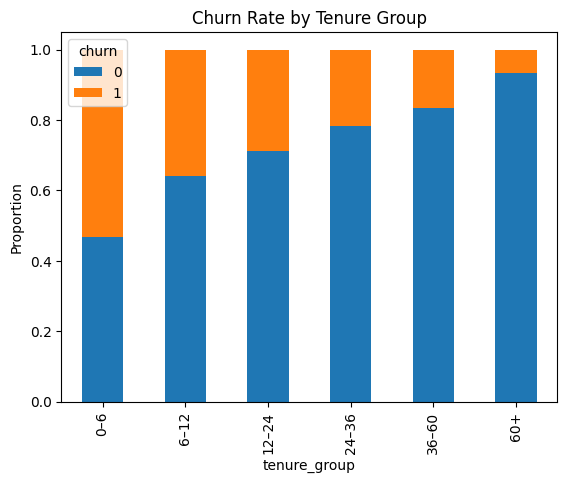

In [35]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 36, 60, 100],
    labels=['0–6', '6–12', '12–24', '24–36', '36–60', '60+']
)


tenure_churn = df.groupby('tenure_group')['churn'].value_counts(normalize=True).unstack()

tenure_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Proportion')
plt.show()


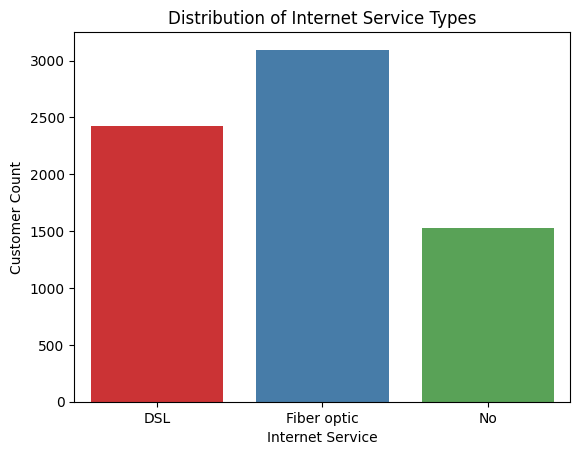

In [36]:
plt.figure()
sns.countplot(x='internet_service', data=df, palette='Set1')
plt.title('Distribution of Internet Service Types')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')
plt.show()

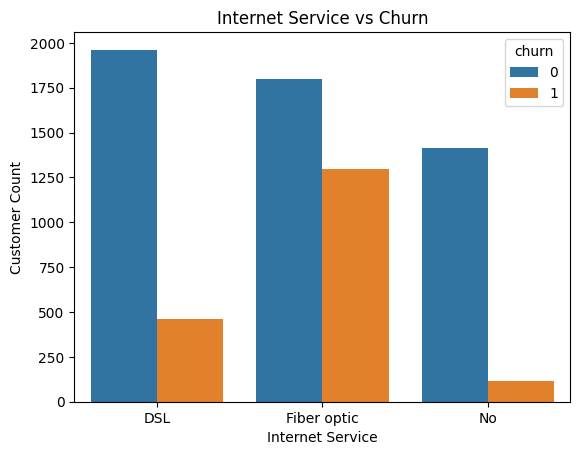

In [37]:
plt.figure()
sns.countplot(x='internet_service', hue='churn', data=df)
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')
plt.show()


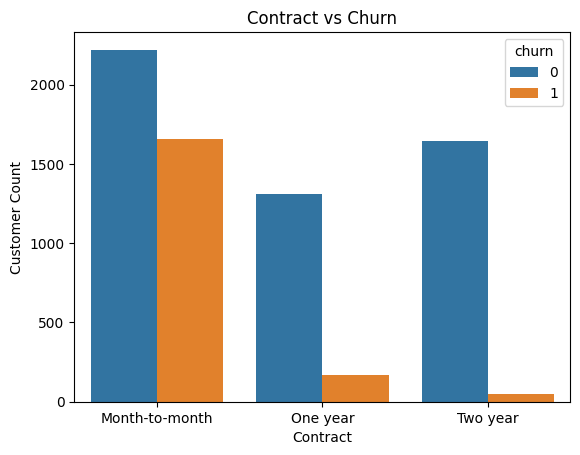

In [38]:
plt.figure()
sns.countplot(x='contract', hue='churn', data=df)
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Customer Count')
plt.show()


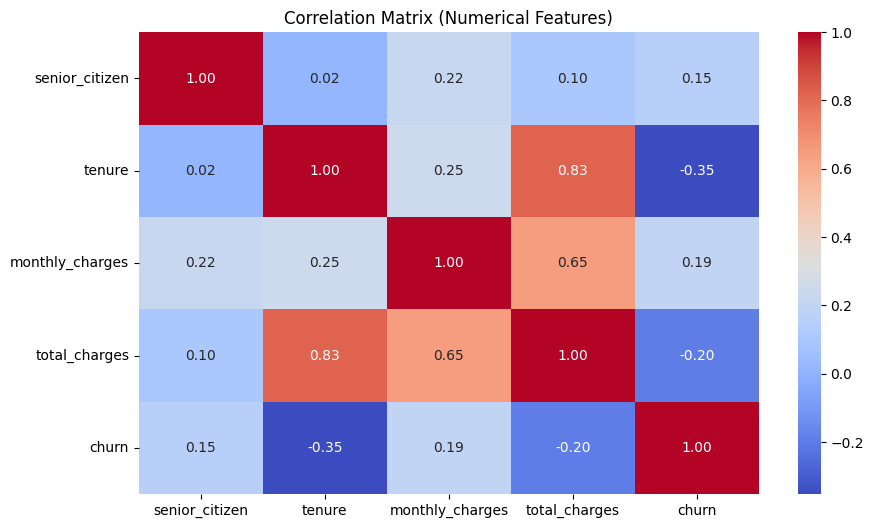

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [40]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0–6
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,24–36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0–6
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,36–60
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0–6


In [41]:
df.drop(columns='tenure',inplace=True)

In [42]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [43]:
df.tenure_group.dtype

CategoricalDtype(categories=['0–6', '6–12', '12–24', '24–36', '36–60', '60+'], ordered=True, categories_dtype=object)

In [44]:
df['tenure_group'].isnull().sum()

np.int64(11)

In [45]:
df['tenure_group'] = df['tenure_group'].fillna(df['tenure_group'].mode()[0])

In [46]:
df['tenure_group'].isnull().sum()

np.int64(0)

#### Splitting the data before encoding the categories to avoid data leakage

In [47]:
X = df.drop('churn',axis=1)
y = df['churn']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [49]:
for col in cat_cols:
    if cat_cols[col].nunique()<=2:
            print(f"\nThe unique value for category {col} :{cat_cols[col].unique()}")


The unique value for category gender :['Female' 'Male']

The unique value for category partner :['Yes' 'No']

The unique value for category dependents :['No' 'Yes']

The unique value for category phone_service :['No' 'Yes']

The unique value for category paperless_billing :['Yes' 'No']

The unique value for category churn :['No' 'Yes']


In [50]:
df.senior_citizen.dtype

dtype('int64')

In [51]:
binary_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' and X_train[col].nunique()<=2]
binary_cols

['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing']

#### Apply Label Encoding to categories which has only 2 categories (Label Encoding assigns a unique value for e.g. for male-0,female-1,other-3) 

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    
    # Fit only on training data
    X_train[col] = le.fit_transform(X_train[col])
    
    # Transform test data
    X_test[col] = le.transform(X_test[col])
    
    label_encoders[col] = le  # save encoder

In [53]:
X_train.head()

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,tenure_group
2142,0,0,0,1,1,No,DSL,Yes,No,Yes,No,No,Yes,One year,0,Mailed check,64.85,1336.800,12–24
1623,0,0,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,1,Bank transfer (automatic),97.20,5129.450,36–60
6074,1,0,1,0,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,23.45,23.450,0–6
1362,1,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.20,237.950,0–6
6754,1,0,0,1,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,1,Bank transfer (automatic),61.90,1397.475,36–60


In [54]:
X_test.head()

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,tenure_group
185,0,0,1,0,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,24.80,24.80,0–6
2715,1,0,0,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer (automatic),25.25,996.45,36–60
3825,0,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.35,1031.70,36–60
1807,0,0,0,0,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,0,Electronic check,76.35,76.35,0–6
132,1,0,0,0,1,No,DSL,No,No,No,Yes,No,No,Two year,0,Bank transfer (automatic),50.55,3260.10,60+


In [55]:
for col in X_train:
    if X_train[col].dtype=='object' and X_train[col].nunique()>=3:
            print(f"\nThe unique value for category {col} :{X_train[col].unique()}")


The unique value for category multiple_lines :['No' 'Yes' 'No phone service']

The unique value for category internet_service :['DSL' 'Fiber optic' 'No']

The unique value for category online_security :['Yes' 'No' 'No internet service']

The unique value for category online_backup :['No' 'Yes' 'No internet service']

The unique value for category device_protection :['Yes' 'No' 'No internet service']

The unique value for category tech_support :['No' 'Yes' 'No internet service']

The unique value for category streaming_tv :['No' 'Yes' 'No internet service']

The unique value for category streaming_movies :['Yes' 'No' 'No internet service']

The unique value for category contract :['One year' 'Two year' 'Month-to-month']

The unique value for category payment_method :['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']


In [56]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(
    categories=[['Month-to-month', 'One year', 'Two year']],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X_train[['contract']] = oe.fit_transform(X_train[['contract']])
X_test[['contract']] = oe.transform(X_test[['contract']])

In [57]:
encoder = OrdinalEncoder(
    categories=[['0–6', '6–12', '12–24', '24–36', '36–60', '60+']]
)

X_train['tenure_group'] = encoder.fit_transform(X_train[['tenure_group']])

X_test['tenure_group'] = encoder.transform(X_test[['tenure_group']])


In [58]:
X_train

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,tenure_group
2142,0,0,0,1,1,No,DSL,Yes,No,Yes,No,No,Yes,1.0,0,Mailed check,64.85,1336.800,2.0
1623,0,0,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,2.0,1,Bank transfer (automatic),97.20,5129.450,4.0
6074,1,0,1,0,0,No phone service,DSL,No,No,No,No,No,No,0.0,1,Electronic check,23.45,23.450,0.0
1362,1,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,0.0,1,Electronic check,70.20,237.950,0.0
6754,1,0,0,1,1,Yes,DSL,Yes,Yes,No,Yes,No,No,2.0,1,Bank transfer (automatic),61.90,1397.475,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,No,Fiber optic,Yes,No,No,No,Yes,Yes,0.0,1,Electronic check,95.00,95.000,0.0
5191,0,0,1,1,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,2.0,1,Credit card (automatic),91.10,2198.300,2.0
5226,1,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0.0,1,Electronic check,21.15,306.050,1.0
5390,1,1,0,0,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,0.0,1,Electronic check,99.45,1200.150,1.0


In [59]:
X_test

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,tenure_group
185,0,0,1,0,0,No phone service,DSL,No,No,No,No,No,No,0.0,1,Electronic check,24.80,24.80,0.0
2715,1,0,0,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0.0,1,Bank transfer (automatic),25.25,996.45,4.0
3825,0,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2.0,0,Mailed check,19.35,1031.70,4.0
1807,0,0,0,0,1,No,Fiber optic,No,No,Yes,No,No,No,0.0,0,Electronic check,76.35,76.35,0.0
132,1,0,0,0,1,No,DSL,No,No,No,Yes,No,No,2.0,0,Bank transfer (automatic),50.55,3260.10,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,1,No,DSL,No,Yes,Yes,Yes,No,Yes,2.0,1,Mailed check,68.30,4378.80,5.0
315,1,0,1,1,1,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,1.0,0,Credit card (automatic),110.05,5686.40,4.0
2439,1,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1.0,0,Bank transfer (automatic),19.90,329.75,2.0
5002,0,0,1,1,0,No phone service,DSL,Yes,No,Yes,No,No,Yes,2.0,1,Credit card (automatic),43.95,2960.10,5.0


In [60]:
##One hot encoding fo the columns which are nominal/no order
#multiple_lines
#internet_service
#online_security
#online_backup
#device_protection
#tech_support
#streamingtv
#streaming_movies
#payment_method


ohe_cols = [
    'multiple_lines', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies', 'payment_method'
]

ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', ohe, ohe_cols)
    ],
    remainder='passthrough'  # keep numeric columns
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [61]:
X_train_encoded

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 6.48500e+01,
        1.33680e+03, 2.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 9.72000e+01,
        5.12945e+03, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.34500e+01,
        2.34500e+01, 0.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.11500e+01,
        3.06050e+02, 1.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 9.94500e+01,
        1.20015e+03, 1.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.98000e+01,
        4.57300e+02, 3.00000e+00]], shape=(5634, 38))

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [64]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [65]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f} | Precision={precision:.3f} | Recall={recall:.3f}")


Threshold=0.10 | Precision=0.408 | Recall=0.957
Threshold=0.15 | Precision=0.439 | Recall=0.930
Threshold=0.20 | Precision=0.468 | Recall=0.874
Threshold=0.25 | Precision=0.510 | Recall=0.836
Threshold=0.30 | Precision=0.547 | Recall=0.796
Threshold=0.35 | Precision=0.580 | Recall=0.740
Threshold=0.40 | Precision=0.613 | Recall=0.697
Threshold=0.45 | Precision=0.638 | Recall=0.633
Threshold=0.50 | Precision=0.667 | Recall=0.558
Threshold=0.55 | Precision=0.705 | Recall=0.475
Threshold=0.60 | Precision=0.732 | Recall=0.410
Threshold=0.65 | Precision=0.774 | Recall=0.330
Threshold=0.70 | Precision=0.776 | Recall=0.260
Threshold=0.75 | Precision=0.841 | Recall=0.142
Threshold=0.80 | Precision=0.846 | Recall=0.059
Threshold=0.85 | Precision=1.000 | Recall=0.013


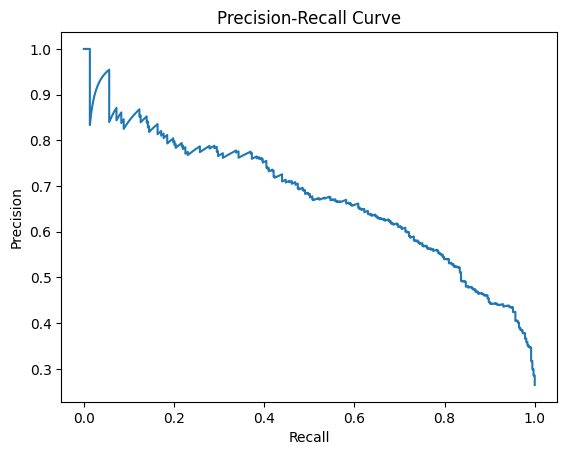

In [66]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

best_threshold = 0.25
y_pred_final = (y_prob >= best_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


[[736 300]
 [ 61 312]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.51      0.84      0.63       373

    accuracy                           0.74      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



In [68]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    average_precision_score
)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("PR-AUC:", average_precision_score(y_test, y_prob))


[[1036    0]
 [ 368    5]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       1.00      0.01      0.03       373

    accuracy                           0.74      1409
   macro avg       0.87      0.51      0.44      1409
weighted avg       0.81      0.74      0.63      1409

PR-AUC: 0.6775563752063469


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'   # important for imbalance
)
param_dist = {
    'n_estimators': [200, 300, 500, 700],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.5]
}
scoring_metric = 'recall'

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,              # good balance of speed & coverage
    scoring=scoring_metric,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_

print("Best Parameters:")
print(random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 5}


In [70]:
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]

y_pred = best_rf.predict(X_test_scaled)

threshold = 0.35   # lower than 0.5 → higher recall
y_pred_tuned = (y_prob >= threshold).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned))

cm = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:\n", cm)


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.57      0.72      1036
           1       0.44      0.92      0.59       373

    accuracy                           0.67      1409
   macro avg       0.70      0.75      0.65      1409
weighted avg       0.82      0.67      0.68      1409

Confusion Matrix:
 [[594 442]
 [ 29 344]]


In [71]:
## Automatically choose threshold for target recall (e.g. ≥ 80%)
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

target_recall = 0.80
idx = np.where(recall >= target_recall)[0][-1]

best_threshold = thresholds[idx]

print("Best Threshold:", best_threshold)
print("Recall:", recall[idx])
print("Precision:", precision[idx])


Best Threshold: 0.53896805973518
Recall: 0.8016085790884718
Precision: 0.5537037037037037


[[770 266]
 [ 66 307]]


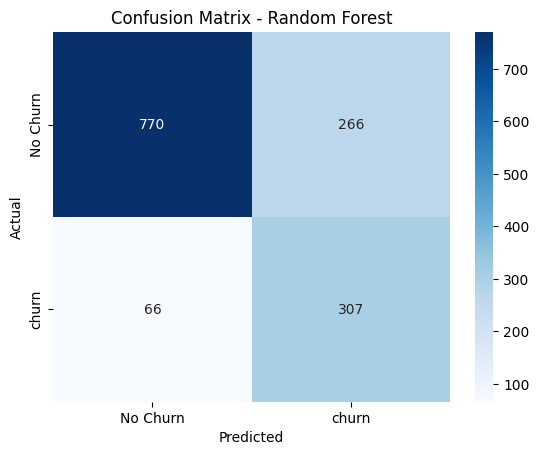

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'churn'],
            yticklabels=['No Churn', 'churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [73]:
!pip install xgboost

  Using cached xgboost-3.1.3-py3-none-macosx_10_15_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-macosx_10_15_x86_64.whl (2.4 MB)


In [78]:
import xgboost as xgb
from xgboost import XGBClassifier

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',          # PR-AUC (best for churn/fraud)
    scale_pos_weight=scale_pos_weight,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'aucpr'


In [79]:
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("PR-AUC:", average_precision_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.55      0.74      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

[[808 228]
 [ 97 276]]
PR-AUC: 0.6770584723969602


In [80]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.3]
}

xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',     # 🚨 churn → recall focused
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)
best_xgb = random_search.best_estimator_
print("Best Params:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 1.0}


In [81]:
y_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.35).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("PR-AUC:", average_precision_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.96      0.53      0.68      1036
           1       0.42      0.94      0.58       373

    accuracy                           0.64      1409
   macro avg       0.69      0.74      0.63      1409
weighted avg       0.82      0.64      0.66      1409

[[551 485]
 [ 23 350]]
PR-AUC: 0.6829631183968838


In [ ]:
##Encoding code
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

onehot_cols = [
    "gender", "partner", "dependents", "phone_service",
    "multiple_lines", "internet_service", "online_security",
    "online_backup", "device_protection", "tech_support",
    "streaming_tv", "streaming_movies",
    "paperless_billing", "payment_method"
]

ordinal_cols = [
    "contract", "tenure_group"
]

numeric_cols = [
    "monthly_charges", "total_charges"
]

ordinal_categories = [
    ["Month-to-month", "One year", "Two year"],
    ["0-12", "12-24", "24-36", "36-48", "48-60", "60+"]
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_cols),
        ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), onehot_cols)
    ]
)


In [84]:
import joblib

joblib.dump(best_xgb, "model/churn_model.pkl")
joblib.dump(preprocessor, "model/preprocessor.pkl")


['model/preprocessor.pkl']

In [85]:
print(preprocessor.feature_names_in_)

['gender' 'senior_citizen' 'partner' 'dependents' 'phone_service'
 'multiple_lines' 'internet_service' 'online_security' 'online_backup'
 'device_protection' 'tech_support' 'streaming_tv' 'streaming_movies'
 'contract' 'paperless_billing' 'payment_method' 'monthly_charges'
 'total_charges' 'tenure_group']
